In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# **Loading the dataset**

In [256]:
data= pd.read_csv('/content/drive/MyDrive/Projects/Loan bank prediction- Classification/train_u6lujuX_CVtuZ9i.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [257]:
data.duplicated().any()
# we got no duplicated rows

False

# **Feature describtion**
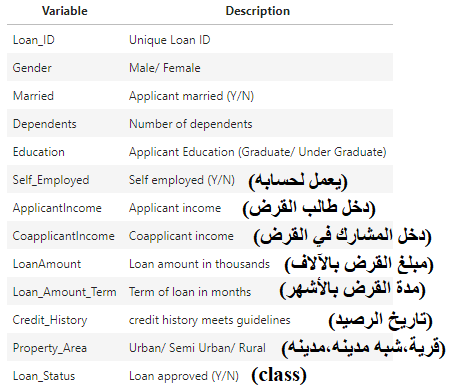

In [258]:
data= data.drop(columns=['Loan_ID'])
print(data.shape,'\n')
print(data.head())

(614, 12) 

  Gender Married Dependents  ... Credit_History Property_Area  Loan_Status
0   Male      No          0  ...            1.0         Urban            Y
1   Male     Yes          1  ...            1.0         Rural            N
2   Male     Yes          0  ...            1.0         Urban            Y
3   Male     Yes          0  ...            1.0         Urban            Y
4   Male      No          0  ...            1.0         Urban            Y

[5 rows x 12 columns]


In [259]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# **Cleaning**

In [233]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [260]:
# fill the missing values for numerical terms by mean
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [261]:
# fill the missing values for categorical terms - mode
data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])

In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

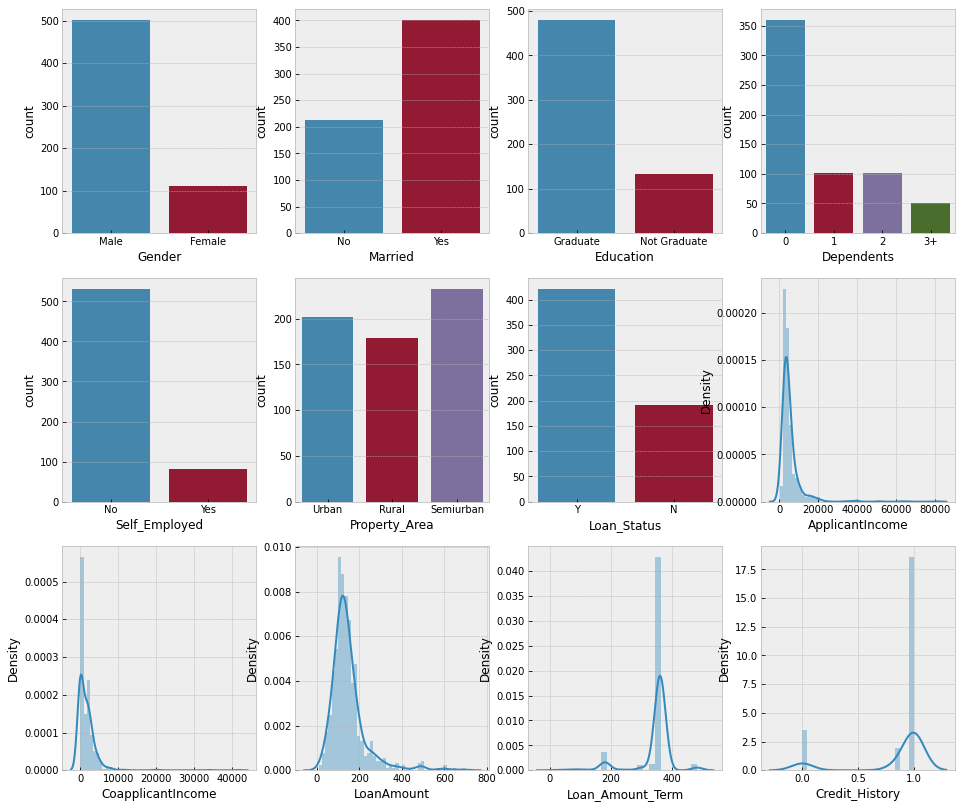

In [35]:
# categorical attributes visualization
plt.style.use('bmh')
plt.figure(figsize=(16,14))
plt.subplot(3,4,1)
sns.countplot(data['Gender'])
plt.subplot(3,4,2)
sns.countplot(data['Married'])
plt.subplot(3,4,3)
sns.countplot(data['Education'])
plt.subplot(3,4,4)
sns.countplot(data['Dependents'])
plt.subplot(3,4,5)
sns.countplot(data['Self_Employed'])
plt.subplot(3,4,6)
sns.countplot(data['Property_Area'])
plt.subplot(3,4,7)
sns.countplot(data['Loan_Status'])

# numerical attributes visualization
plt.subplot(3,4,8)
sns.distplot(data["ApplicantIncome"])
plt.subplot(3,4,9)
sns.distplot(data["CoapplicantIncome"])
plt.subplot(3,4,10)
sns.distplot(data["LoanAmount"])
plt.subplot(3,4,11)
sns.distplot(data['Loan_Amount_Term'])
plt.subplot(3,4,12)
sns.distplot(data['Credit_History'])
plt.show()

In [263]:
# total income and monthly_payment
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['monthly_payment']= data['LoanAmount'] + data['Loan_Amount_Term'] 
data.head()
print(data.shape)

(614, 14)


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Total_Income       614 non-null    float64
 13  monthly_payment    614 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 67.3+ KB


In [265]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'monthly_payment'],
      dtype='object')

In [267]:
# categorical data
cat= ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
categorical_data= data[c]
categorical_data.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,Male,No,Graduate,No,Urban,Y,0
1,Male,Yes,Graduate,No,Rural,N,1
2,Male,Yes,Graduate,Yes,Urban,Y,0
3,Male,Yes,Not Graduate,No,Urban,Y,0
4,Male,No,Graduate,No,Urban,Y,0


In [268]:
from sklearn.preprocessing import LabelEncoder
c = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le= LabelEncoder()
for i in c:
  categorical_data[i]= le.fit_transform(categorical_data[i])
  
categorical_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents
0,1,0,0,0,2,1,0
1,1,1,0,0,0,0,1
2,1,1,0,1,2,1,0
3,1,1,1,0,2,1,0
4,1,0,0,0,2,1,0


In [269]:
# numerical data
num= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Total_Income', 'monthly_payment']

numerical_data=data[num]
numerical_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,monthly_payment
0,5849,0.0,146.412162,360.0,1.0,5849.0,506.412162
1,4583,1508.0,128.000000,360.0,1.0,6091.0,488.000000
2,3000,0.0,66.000000,360.0,1.0,3000.0,426.000000
3,2583,2358.0,120.000000,360.0,1.0,4941.0,480.000000
4,6000,0.0,141.000000,360.0,1.0,6000.0,501.000000


In [270]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
numerical_data= st.fit_transform(numerical_data)
numerical_data=pd.DataFrame(numerical_data)
numerical_data.columns= data[num].columns
numerical_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,monthly_payment
0,0.072991,-0.554487,0.000000,0.279851,0.45164,-0.182184,0.167075
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-0.144684,-0.003826
2,-0.393747,-0.554487,-0.957641,0.279851,0.45164,-0.623656,-0.579308
3,-0.462062,0.251980,-0.314547,0.279851,0.45164,-0.322885,-0.078081
4,0.097728,-0.554487,-0.064454,0.279851,0.45164,-0.158785,0.116840


In [271]:
new_data=pd.concat([categorical_data, numerical_data], axis= True)
new_data.head()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,monthly_payment
0,1,0,0,0,2,1,0,0.072991,-0.554487,0.000000,0.279851,0.45164,-0.182184,0.167075
1,1,1,0,0,0,0,1,-0.134412,-0.038732,-0.219273,0.279851,0.45164,-0.144684,-0.003826
2,1,1,0,1,2,1,0,-0.393747,-0.554487,-0.957641,0.279851,0.45164,-0.623656,-0.579308
3,1,1,1,0,2,1,0,-0.462062,0.251980,-0.314547,0.279851,0.45164,-0.322885,-0.078081
4,1,0,0,0,2,1,0,0.097728,-0.554487,-0.064454,0.279851,0.45164,-0.158785,0.116840


In [272]:
new_data.describe()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,monthly_payment
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,0.817590,0.653094,0.218241,0.133550,1.037459,0.687296,0.744300,-2.694189e-17,-3.977998e-18,1.952835e-17,-1.864234e-16,1.952835e-16,1.034279e-16,-2.452006e-16
std,0.386497,0.476373,0.413389,0.340446,0.787482,0.463973,1.009623,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.636463e+00,-5.130593e+00,-2.410441e+00,-8.650794e-01,-3.456719e+00
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.497524e-01,2.798505e-01,4.516405e-01,-4.429764e-01,-3.194127e-01
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.073642e-01,2.798505e-01,4.516405e-01,-2.492027e-01,-2.703061e-02
75%,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,6.414426e-02,2.312023e-01,2.183882e-01,2.798505e-01,4.516405e-01,7.702060e-02,3.303253e-01
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.238462e+01,1.369617e+01,6.592764e+00,2.145521e+00,4.516405e-01,1.146299e+01,5.955200e+00


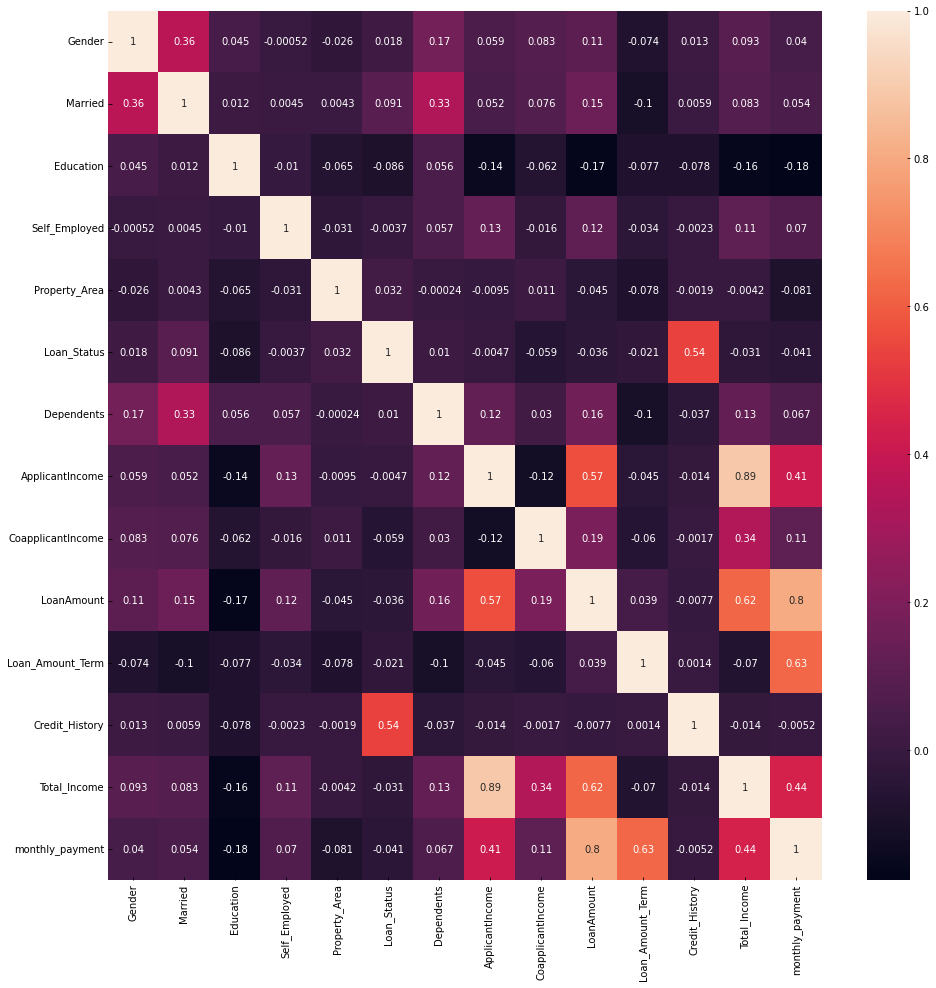

In [273]:
new_data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(new_data.corr(), annot=True)

In [274]:
new_data.corrwith(new_data['Loan_Status']).abs().sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Education            0.085884
CoapplicantIncome    0.059187
monthly_payment      0.040904
LoanAmount           0.036416
Property_Area        0.032112
Total_Income         0.031271
Loan_Amount_Term     0.020974
Gender               0.017987
Dependents           0.010118
ApplicantIncome      0.004710
Self_Employed        0.003700
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


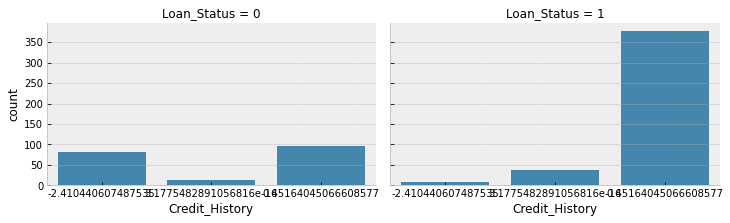

In [194]:
# Credit_History

grid = sns.FacetGrid(new_data,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History');

# we didn't give a loan for most people who got Credit History = low
# but we did give a loan for most of people who got Credit History = high
# so we can say if you got Credit History = high , you will have better chance to get a loan

# important feature

# **features selection**

In [275]:
unwanted_col=['Self_Employed', 'ApplicantIncome', 'Dependents','Gender'] 
new_dat= new_data.drop(columns= unwanted_col)


'''
Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Education            0.085884
CoapplicantIncome    0.059187
monthly_payment      0.040904
LoanAmount           0.036416
Property_Area        0.032112
Total_Income         0.031271
Loan_Amount_Term     0.020974
Gender               0.017987
Dependents           0.010118
ApplicantIncome      0.004710
Self_Employed        0.003700
dtype: float64
'''


'\nLoan_Status          1.000000\nCredit_History       0.540483\nMarried              0.091478\nEducation            0.085884\nCoapplicantIncome    0.059187\nmonthly_payment      0.040904\nLoanAmount           0.036416\nProperty_Area        0.032112\nTotal_Income         0.031271\nLoan_Amount_Term     0.020974\nGender               0.017987\nDependents           0.010118\nApplicantIncome      0.004710\nSelf_Employed        0.003700\ndtype: float64\n'

In [278]:
print(new_dat.head(3))
print(new_dat.shape)

   Married  Education  ...  Total_Income  monthly_payment
0        0          0  ...     -0.182184         0.167075
1        1          0  ...     -0.144684        -0.003826
2        1          0  ...     -0.623656        -0.579308

[3 rows x 10 columns]
(614, 10)


# **splitting**

In [279]:
y= new_data['Loan_Status']
X= new_data.drop(columns= ['Loan_Status'])
print(new_data.shape)
print(y.shape)
print(X.shape)

(614, 14)
(614,)
(614, 13)


In [280]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, shuffle= True, random_state= 44)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429, 13)
(429,)
(185, 13)
(185,)


In [283]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8578088578088578
0.8216216216216217


In [310]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=50,max_depth=7)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.8624708624708625
0.8432432432432433


In [308]:
from sklearn.svm import SVC
sv= SVC(kernel='rbf',gamma=0.005,C=2500)
sv.fit(X_train,y_train)
print(sv.score(X_train,y_train))
print(sv.score(X_test,y_test))

0.8321678321678322
0.8324324324324325


In [311]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7948717948717948
0.8324324324324325


Conf

In [312]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,auc
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred ))

[[ 28  22]
 [  7 128]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        50
           1       0.85      0.95      0.90       135

    accuracy                           0.84       185
   macro avg       0.83      0.75      0.78       185
weighted avg       0.84      0.84      0.83       185

